In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload from file .csv to notebook
df=pd.read_csv('/Users/bunda/customer_journey_analysis/ecommerce_customer_data_custom_ratios.csv')

In [3]:
# data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [4]:
# number of coloumns and rows
df.shape

(250000, 13)

In [5]:
# Statistical description
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [6]:
# checking null values
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [7]:
# deleting null values in Returns coloumn
df=df[df['Returns'].notna()]

In [8]:
df.shape

# the number of coloumn changing after deleting null values

(202404, 13)

In [9]:
# checking duplicated values
df.duplicated().sum()

0

Exploratory Data Analysis

In [10]:
# Convert date to datetime and to extract day, month, year

df['Purchase Date']=pd.to_datetime(df['Purchase Date'])
df['Purchase Date']

0        2020-09-08 09:38:32
1        2022-03-05 12:56:35
2        2022-05-23 18:18:01
3        2020-11-12 13:13:29
4        2020-11-27 17:55:11
                 ...        
249995   2023-08-10 13:39:06
249996   2021-11-23 01:30:42
249997   2020-07-02 14:04:48
249998   2020-12-30 02:02:40
249999   2021-03-13 16:28:35
Name: Purchase Date, Length: 202404, dtype: datetime64[ns]

In [11]:
# deleting coloumn Age since double with Customer Age

df.drop(columns='Age', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202404 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202404 non-null  int64         
 1   Purchase Date          202404 non-null  datetime64[ns]
 2   Product Category       202404 non-null  object        
 3   Product Price          202404 non-null  int64         
 4   Quantity               202404 non-null  int64         
 5   Total Purchase Amount  202404 non-null  int64         
 6   Payment Method         202404 non-null  object        
 7   Customer Age           202404 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          202404 non-null  object        
 10  Gender                 202404 non-null  object        
 11  Churn                  202404 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), objec

In [12]:
# top 10 customers who buy most products
top_id=list(df['Customer ID'].value_counts().head(10).index)
top10 = df[df['Customer ID'].isin(top_id)]['Customer Name'].unique()
print("Top 10 Customer Names:", list(top10))

Top 10 Customer Names: ['Dr. Courtney Foster', 'John Davis', 'Cassandra Ingram', 'Lindsay Morse', 'Patricia Petersen', 'Kristen Leon', 'Susan Burton', 'Randall Hobbs', 'Whitney Medina', 'Felicia Escobar']


In [13]:
# the busiest day in a week

df['year']=df['Purchase Date'].dt.year
df['month']=df['Purchase Date'].dt.month
df['day']=df['Purchase Date'].dt.day_name()

sales_day=df['day'].value_counts()

most_frequent_day=list(df['day'].value_counts().head(1).index)
print(f"The busiest sales day in a week is {most_frequent_day}")

The busiest sales day in a week is ['Wednesday']


Visualization in Diagramms

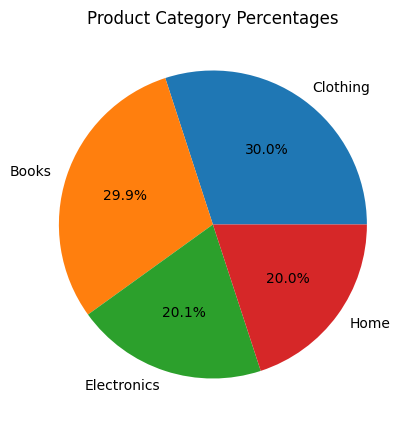

In [14]:
# Presentation of product category
product_types_number=df['Product Category'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(product_types_number, labels=product_types_number.index, autopct='%1.1f%%')
plt.title('Product Category Percentages')
plt.show()

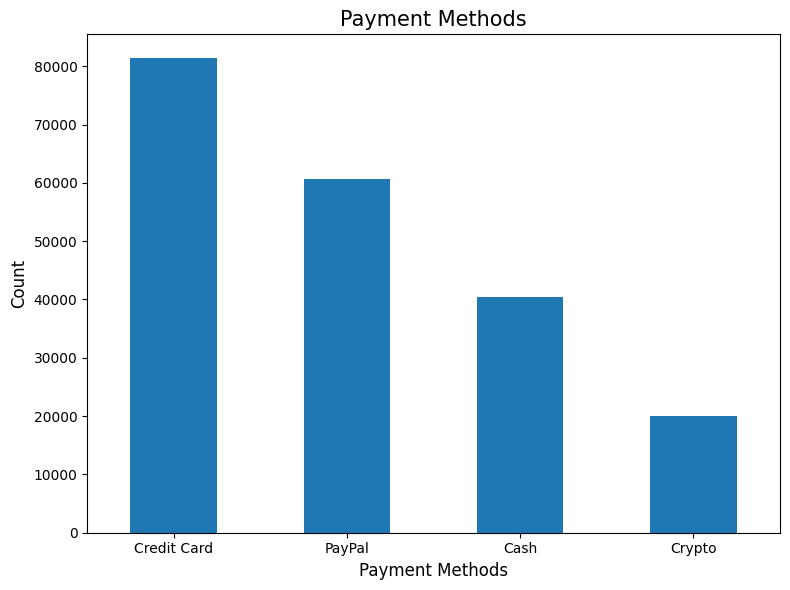

In [18]:
# most payment method the customers used
payment_methods=df['Payment Method'].value_counts()
plt.figure(figsize=(8,6))
payment_methods.plot(kind='bar')
plt.title('Payment Methods', fontsize=15)
plt.xlabel("Payment Methods",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# monthly sales for each product category
monthly_sales_per_category=df.groupby(['month','Product Category'])['Total Purchase Amount'].sum().reset_index()
monthly_sales_per_category

,month,Product Category,Total Purchase Amount
0,1,Books,15305798
1,1,Clothing,15258674
2,1,Electronics,10018307
3,1,Home,9925334
4,2,Books,13984601
5,2,Clothing,13908090
6,2,Electronics,9387838
7,2,Home,9073140
8,3,Books,15269684
9,3,Clothing,15291844


<Axes: xlabel='month', ylabel='Total Purchase Amount'>

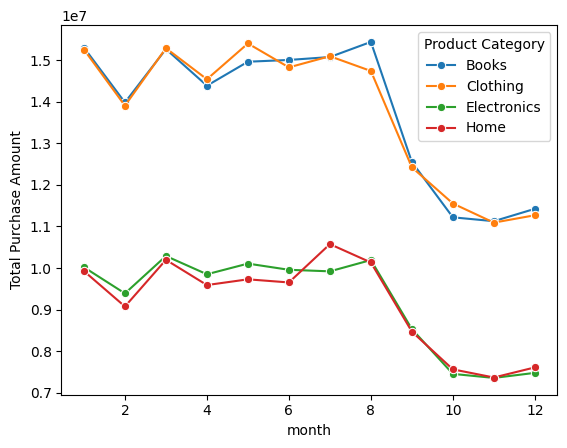

In [21]:
sns.lineplot(
    data=monthly_sales_per_category,
    x='month',
    y='Total Purchase Amount',
    hue='Product Category',
    marker='o'
    
)